In [9]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

from env import get_db_url
from wrangle_zillow import prep_zillow

In [21]:
df = prep_zillow()

In [22]:
# Before I explore i need to split the data
train, test = train_test_split(df, random_state=42)

In [23]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,structuretaxvaluedollarcnt,assessmentyear,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,County,State
46683,12621955,3.00,4.00,"2,184.00","2,184.00","6,037.00","33,806,261.00","-118,293,505.00","5,997.00",0100,...,"226,701.00","2,016.00","7,026.22","60,375,436,032,018.00",0.00,2017-06-15,Single Family Residential,LCR105,Los Angeles,CA
37634,13863286,2.50,3.00,"2,612.00","2,612.00","6,059.00","33,661,935.00","-117,999,928.00","2,938.00",122,...,"228,434.00","2,016.00","10,295.88","60,590,993,111,003.00",0.02,2017-05-19,Single Family Residential,LAR1,Orange,CA
24152,13035208,2.00,3.00,"1,056.00","1,056.00","6,037.00","34,115,930.00","-117,843,423.00","12,240.00",0100,...,"81,148.00","2,016.00","2,588.88","60,374,012,022,017.00",0.13,2017-04-07,Single Family Residential,GDR1,Los Angeles,CA
57098,13962610,2.00,3.00,"2,067.00","2,067.00","6,059.00","33,745,124.00","-117,789,062.00","12,760.00",122,...,"158,410.00","2,016.00","9,751.54","60,590,756,061,010.00",0.00,2017-07-14,Single Family Residential,LAR1,Orange,CA
57331,11176564,3.00,4.00,"3,170.00","3,170.00","6,037.00","34,473,321.00","-118,635,522.00","7,377.00",0101,...,"389,046.00","2,016.00","6,836.12","60,379,201,162,006.00",-0.00,2017-07-14,Single Family Residential,LCA22*,Los Angeles,CA


1. Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

In [24]:
# Change numerical columns that need to stay their value to object

for col in ['fips', 'regionidcity', 'regionidcounty', 'regionidzip', 'latitude', 'longitude']:
    train[col] = train[col].astype('object')

In [25]:
#scale the numeric columns first
scaler = MinMaxScaler()

numeric_columns = list(train.select_dtypes('number').columns)
train[numeric_columns] = scaler.fit_transform(train[numeric_columns])

In [26]:
train.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,structuretaxvaluedollarcnt,assessmentyear,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,County,State
46683,0.01,0.12,0.23,0.10,0.10,"6,037.00","33,806,261.00","-118,293,505.00",0.00,0100,...,0.02,0.00,0.01,0.00,0.46,2017-06-15,Single Family Residential,LCR105,Los Angeles,CA
37634,0.02,0.09,0.15,0.12,0.12,"6,059.00","33,661,935.00","-117,999,928.00",0.00,122,...,0.02,0.00,0.02,0.00,0.46,2017-05-19,Single Family Residential,LAR1,Orange,CA
24152,0.02,0.06,0.15,0.04,0.04,"6,037.00","34,115,930.00","-117,843,423.00",0.00,0100,...,0.01,0.00,0.00,0.00,0.47,2017-04-07,Single Family Residential,GDR1,Los Angeles,CA
57098,0.02,0.06,0.15,0.09,0.09,"6,059.00","33,745,124.00","-117,789,062.00",0.00,122,...,0.02,0.00,0.02,0.00,0.46,2017-07-14,Single Family Residential,LAR1,Orange,CA
57331,0.00,0.12,0.23,0.15,0.15,"6,037.00","34,473,321.00","-118,635,522.00",0.00,0101,...,0.04,0.00,0.01,0.00,0.46,2017-07-14,Single Family Residential,LCA22*,Los Angeles,CA


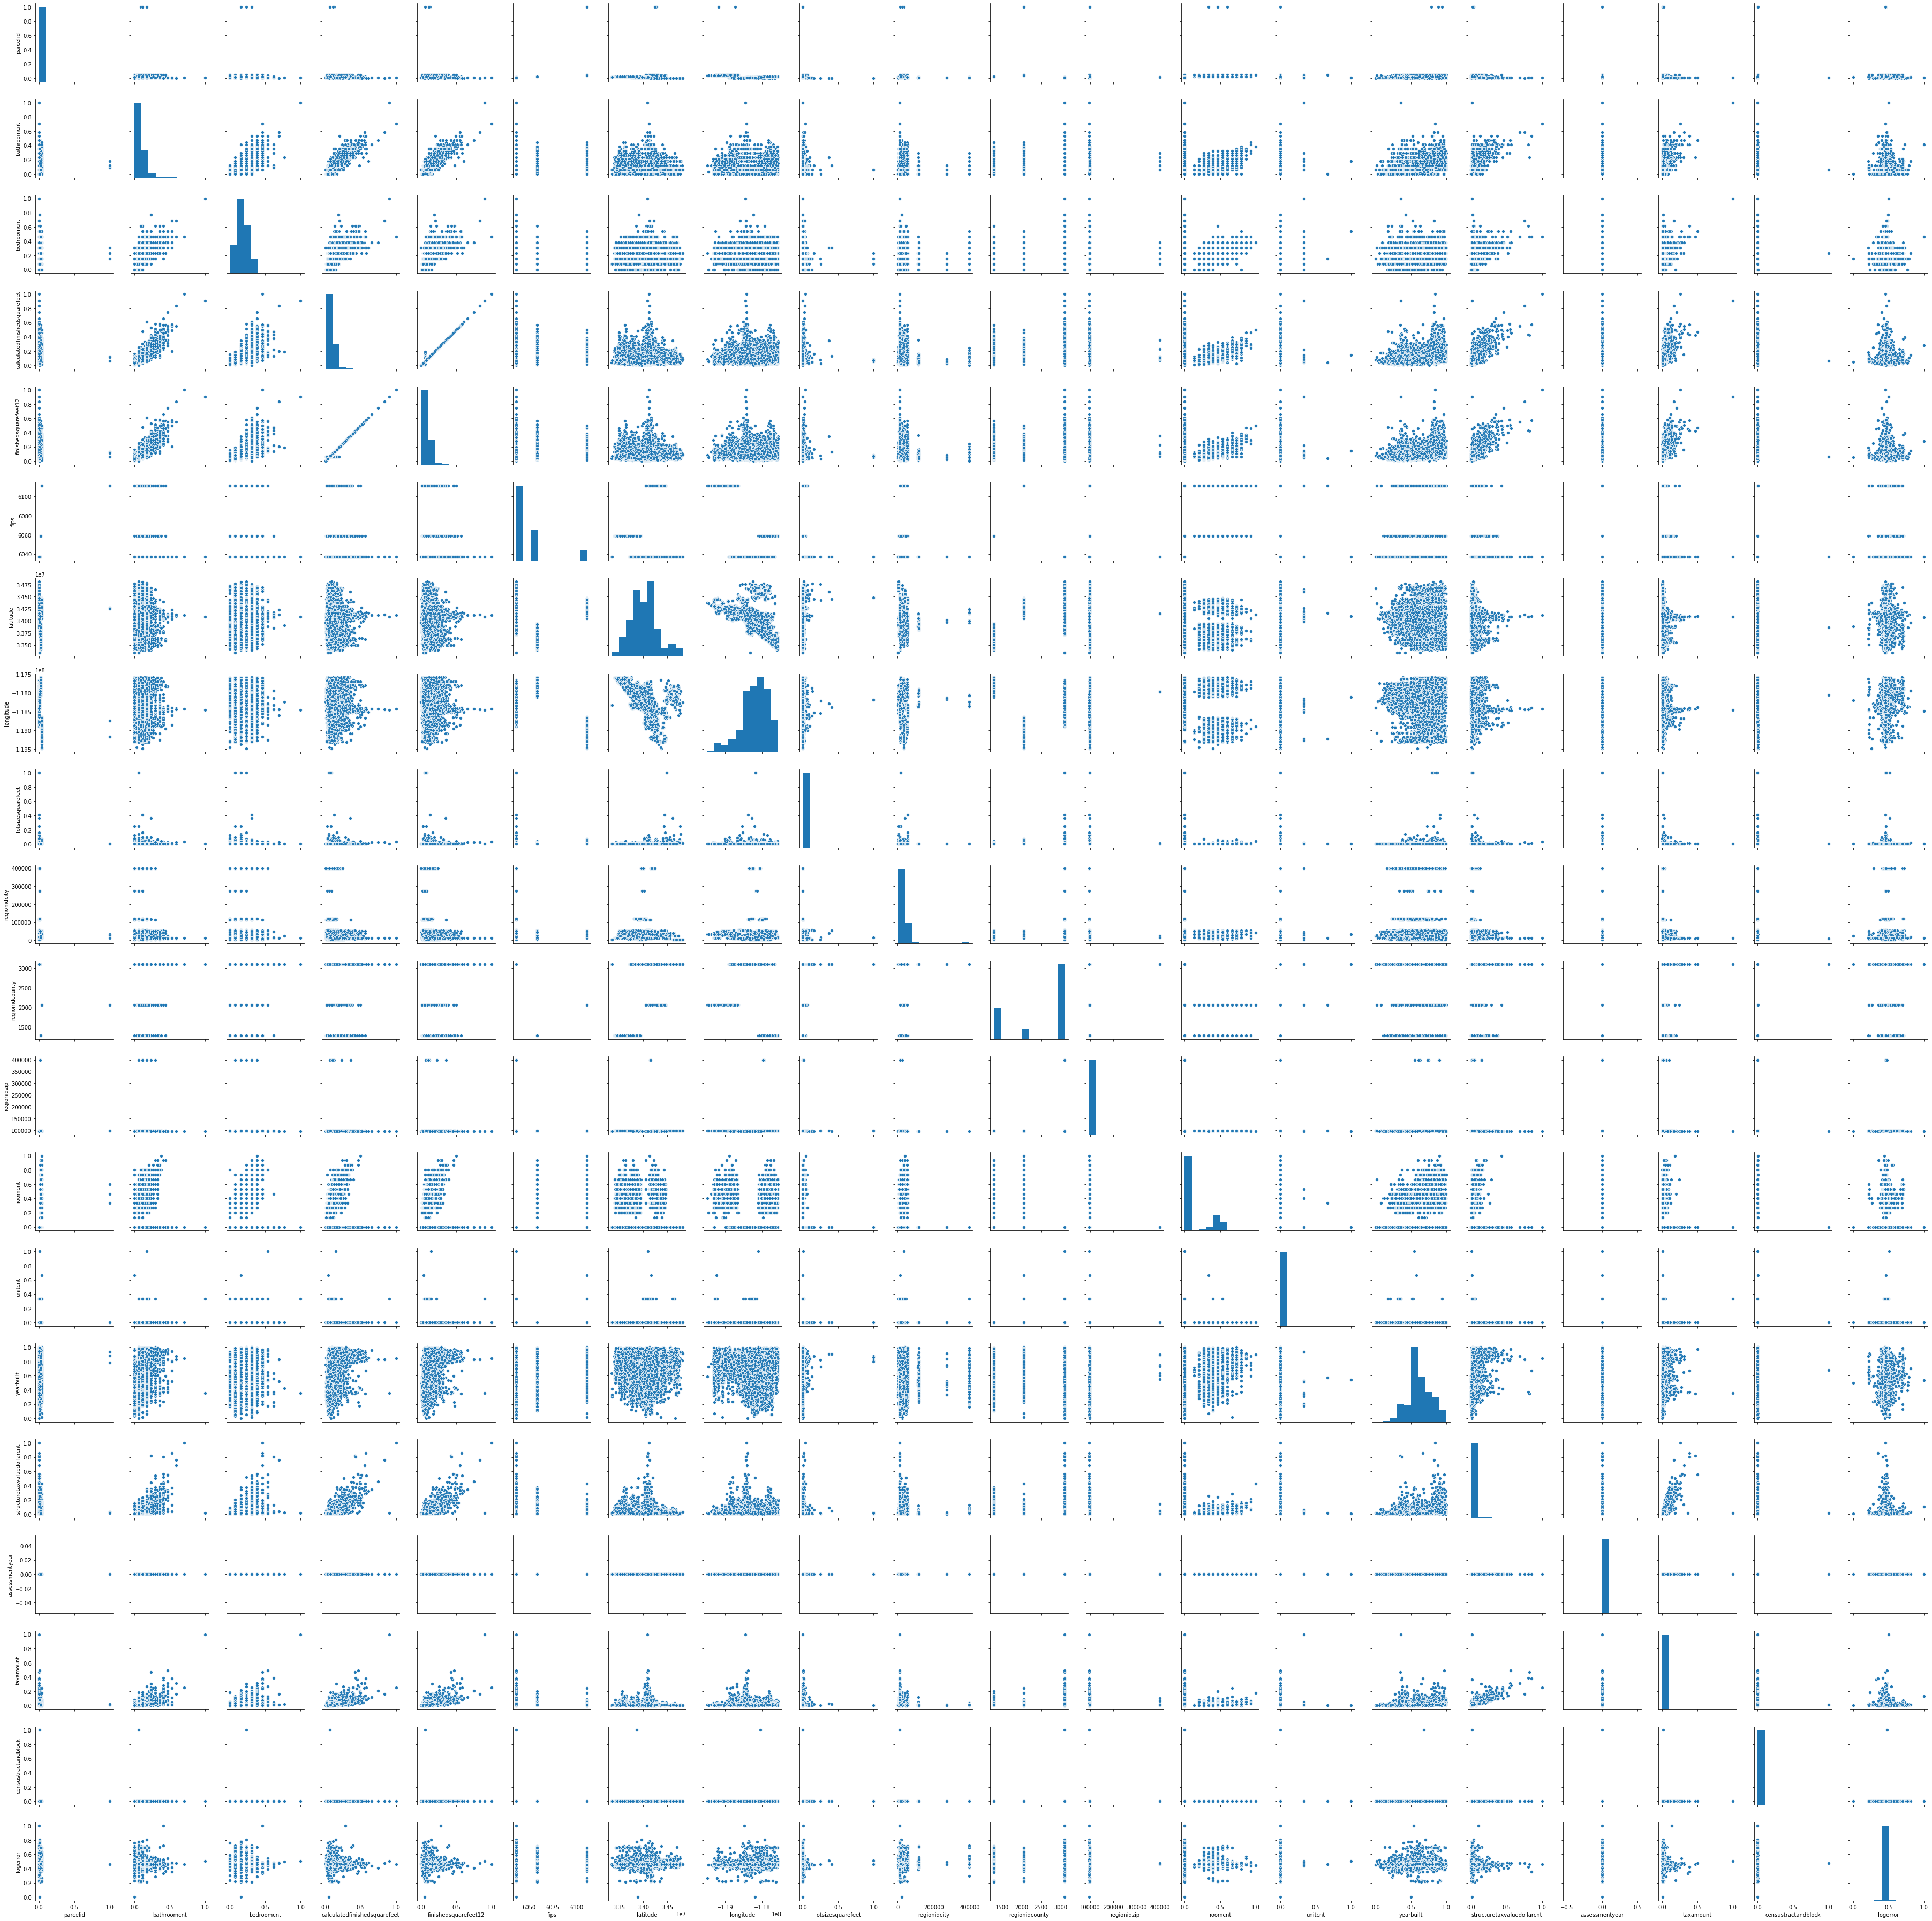

In [29]:
sns.pairplot(train)

2. Plot a correlation matrix heatmap.

In [32]:
#since the above pairplot had to many fields I will create a seperate df to look at correlations
subset = train[["bathroomcnt", "bedroomcnt", "lotsizesquarefeet", "yearbuilt", "calculatedfinishedsquarefeet", "taxamount", "logerror", "fips", "longitude", "latitude", "regionidzip"]]

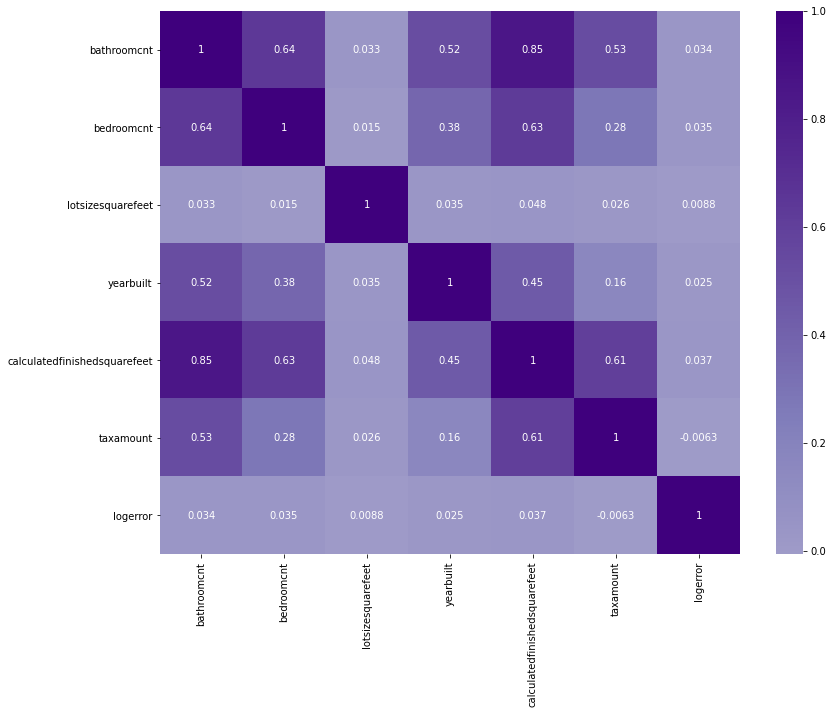

In [35]:
plt.figure(figsize=(13,10))
sns.heatmap(subset.corr(), cmap='Purples', annot=True, center=0)

3. Plot latitude against longitude.

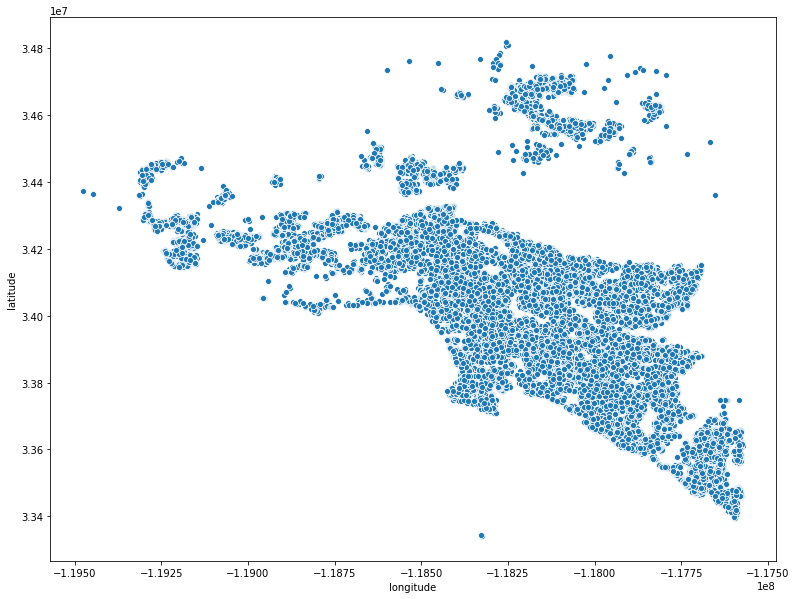

In [38]:
plt.figure(figsize=(13,10))
sns.scatterplot(x="longitude", y="latitude", data=train)

4. Create a useable plot with 4 dimensions, e.g. x, y, color, size.

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38299 entries, 46683 to 24119
Data columns (total 27 columns):
parcelid                        38299 non-null float64
bathroomcnt                     38299 non-null float64
bedroomcnt                      38299 non-null float64
calculatedfinishedsquarefeet    38299 non-null float64
finishedsquarefeet12            38299 non-null float64
fips                            38299 non-null object
latitude                        38299 non-null object
longitude                       38299 non-null object
lotsizesquarefeet               38299 non-null float64
propertycountylandusecode       38299 non-null object
propertyzoningdesc              38299 non-null object
regionidcity                    38299 non-null object
regionidcounty                  38299 non-null object
regionidzip                     38299 non-null object
roomcnt                         38299 non-null float64
unitcnt                         38299 non-null float64
yearbuilt      

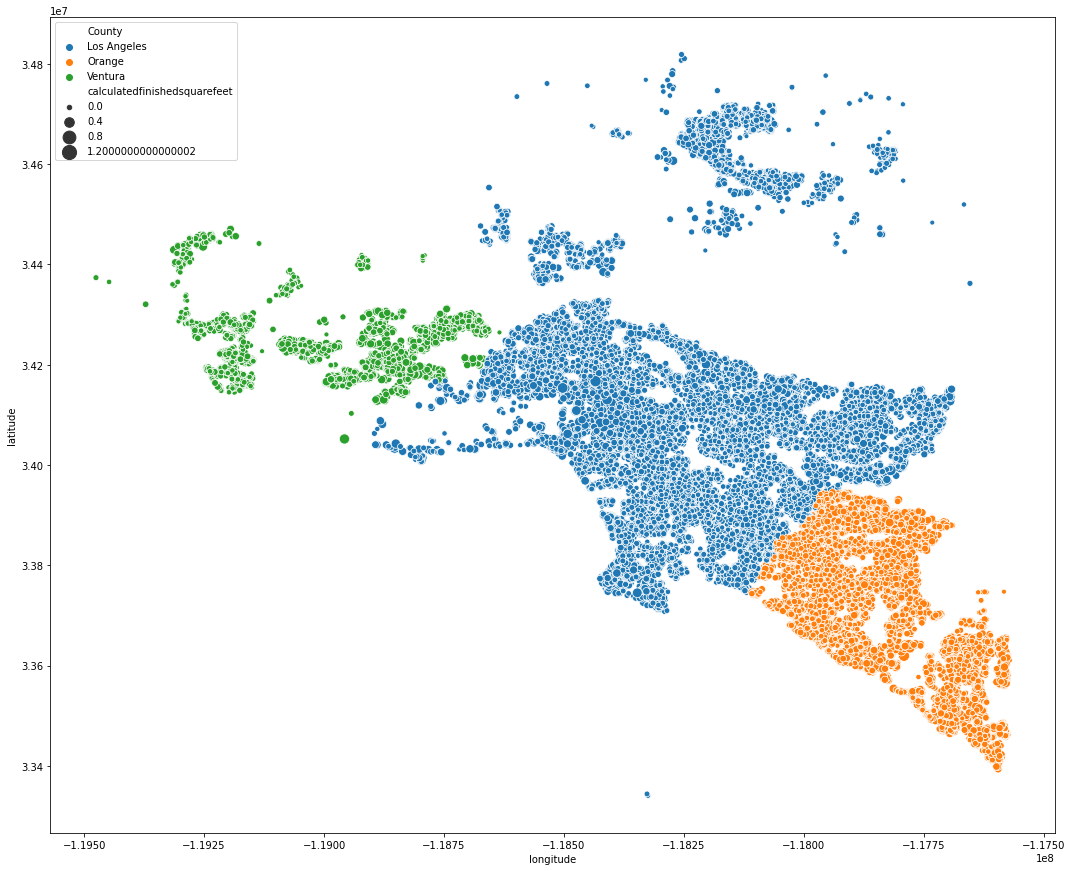

In [42]:
plt.figure(figsize=(18,15))
sns.scatterplot(x="longitude", y="latitude", data=train, hue="County", size="calculatedfinishedsquarefeet", sizes=(20,200))

5. Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [44]:
population_logerror_mean = train.logerror.mean()
zipcode_logerror_mean = train.groupby("regionidzip")['regionidzip','logerror'].mean().reset_index()

In [45]:
population_logerror_mean

0.46024710554753967

In [49]:
zipcode_logerror_mean.head()

,regionidzip,logerror
0,"95,982.00",0.46
1,"95,983.00",0.46
2,"95,984.00",0.45
3,"95,985.00",0.45
4,"95,986.00",0.46


In [50]:
alpha = 0.01

In [51]:
zipcodes = train.regionidzip.unique()

In [55]:
zipcodes_with_significantly_different_errors = []

for zipcode in zipcodes:
    # Run a t-test between the population mean and the mean of a subgroup (zipcode)
    t, p = stats.ttest_1samp(train[train.regionidzip == zipcode].logerror, population_logerror_mean)
    if p < alpha:
        zipcodes_with_significantly_different_errors.append(zipcode)

In [56]:
zipcodes_with_significantly_different_errors

[96197.0,
 96351.0,
 96047.0,
 96974.0,
 96280.0,
 96237.0,
 96152.0,
 96190.0,
 96137.0,
 96026.0,
 95989.0,
 96020.0,
 96246.0,
 96377.0,
 96120.0,
 95984.0,
 96022.0,
 96946.0,
 96007.0]

In [57]:
properties_with_low_or_high_error = train[train.regionidzip.isin(zipcodes_with_significantly_different_errors)]
properties_with_low_or_high_error

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,...,structuretaxvaluedollarcnt,assessmentyear,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,County,State
50206,0.01,0.00,0.15,0.05,0.05,"6,037.00","33,990,604.00","-118,097,793.00",0.00,0100,...,0.01,0.00,0.01,0.00,0.47,2017-06-26,Single Family Residential,PRSF*,Los Angeles,CA
44875,0.04,0.12,0.23,0.10,0.10,"6,111.00","34,177,662.00","-118,890,726.00",0.00,1111,...,0.03,0.00,0.01,0.00,0.46,2017-06-09,Single Family Residential,LAR1,Ventura,CA
9234,0.01,0.12,0.38,0.12,0.12,"6,037.00","34,014,413.00","-118,062,176.00",0.00,0100,...,0.03,0.00,0.01,0.00,0.46,2017-02-10,Single Family Residential,PRRE-SF*,Los Angeles,CA
47934,0.01,0.00,0.08,0.05,0.05,"6,037.00","33,998,829.00","-118,444,866.00",0.00,0100,...,0.02,0.00,0.02,0.00,0.44,2017-06-19,Single Family Residential,LAR1,Los Angeles,CA
49745,0.02,0.18,0.23,0.18,0.18,"6,059.00","33,565,074.00","-117,739,895.00",0.00,122,...,0.06,0.00,0.02,0.00,0.46,2017-06-23,Single Family Residential,LAR1,Orange,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637,0.01,0.06,0.23,0.07,0.07,"6,037.00","34,014,623.00","-118,074,484.00",0.00,0101,...,0.02,0.00,0.01,0.00,0.46,2017-02-08,Single Family Residential,PRSF*,Los Angeles,CA
33176,0.01,0.06,0.23,0.07,0.07,"6,037.00","34,013,239.00","-118,444,511.00",0.00,0100,...,0.01,0.00,0.01,0.00,0.45,2017-05-05,Single Family Residential,LAR1,Los Angeles,CA
62971,0.01,0.06,0.23,0.08,0.08,"6,037.00","33,981,913.00","-118,093,299.00",0.00,0100,...,0.01,0.00,0.00,0.00,0.47,2017-08-01,Single Family Residential,PRSF*,Los Angeles,CA
5420,0.01,0.00,0.15,0.04,0.04,"6,037.00","33,946,215.00","-118,270,507.00",0.00,0100,...,0.01,0.00,0.00,0.00,0.46,2017-01-25,Single Family Residential,LAR2,Los Angeles,CA


6. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [59]:
train.County.value_counts()

Los Angeles    24756
Orange         10296
Ventura         3247
Name: County, dtype: int64

In [60]:
#make df for each county
la = train[train.County == "Los Angeles"]
orange = train[train.County == "Orange"]
ventura = train[train.County == "Ventura"]

$H_0$: Logerror for LA County and Orange County properties are the same

$H_a$: Logerror for LA County and Orange County are significantly different

In [61]:
alpha = .01

t, p = stats.ttest_ind(la.logerror, orange.logerror)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


$H_0$: Logerror for LA County and Ventura County properties are the same

$H_a$: Logerror for LA County and Ventura County are significantly different

In [62]:
alpha = .01

t, p = stats.ttest_ind(la.logerror, ventura.logerror)

if p < alpha:
    print("Reject the null hypothesis")
    print("Logerror for LA County and Ventura County are significantly different")
else:
    print("Fail to reject the null hypothesis")
    print("We fail to reject the null that Logerror for LA County and Ventury are the same")


Fail to reject the null hypothesis
We fail to reject the null that Logerror for LA County and Ventury are the same


$H_0$: Logerror for Orange County and Ventura County properties are the same

$H_a$: Logerror for Orange County and Ventura County are significantly different

In [65]:
alpha = .01 # confidence level of .99

t, p = stats.ttest_ind(ventura.logerror, orange.logerror)

if p < alpha:
    print("Reject the null hypothesis")
    print("Logerror between ventura county and orange county are significantly different")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis
Logerror between ventura county and orange county are significantly different


# Conclusions So far:
- Ventura and Orange have significantly different log errors
- LA County and Orange County have significantly different log errors
- We fail to reject the hypothesis that LA County and Ventura have statistically similar errors